-------- La prediction du prix d'une voiture d'occasion Par ZIAN Hafsa ------

Importation des bibliothèques et la base de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# Charger les données
data = pd.read_csv("car_data.csv")
print('\nNumber of rows and columns in the data set: ',data.shape)
print('')
#Lets look into top few rows and columns in the dataset
data.head()




Number of rows and columns in the data set:  (301, 9)



,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


 ----------------- Identification des colonnes numériques et catégorielles, encodage les variables catégorielles 
 et normaliser les variables numériques ------------------

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger les données
car_data = pd.read_csv('car_data.csv')

# Afficher les types de colonnes pour identifier les numériques et les catégorielles
print("Types de colonnes :")
print(car_data.dtypes)

# Séparer les colonnes numériques et catégorielles
numerical_features = car_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = car_data.select_dtypes(include=['object']).columns

print("\nColonnes numériques :")
print(numerical_features)

print("\nColonnes catégorielles :")
print(categorical_features)

# Encoder les variables catégorielles avec pd.get_dummies
car_data_encoded = pd.get_dummies(car_data, columns=categorical_features, drop_first=True)

# Normaliser les variables numériques
scaler = StandardScaler()
car_data_encoded[numerical_features] = scaler.fit_transform(car_data_encoded[numerical_features])

# Afficher les premières lignes après encodage et normalisation
print("\nDonnées après encodage et normalisation :")
print(car_data_encoded.head())


Types de colonnes :
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

Colonnes numériques :
Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

Colonnes catégorielles :
Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

Données après encodage et normalisation :
       Year  Selling_Price  Present_Price  Kms_Driven     Owner  \
0  0.128897      -0.258416      -0.236215   -0.256224 -0.174501   
1 -0.217514       0.017481       0.221505    0.155911 -0.174501   
2  1.168129       0.510154       0.257427   -0.773969 -0.174501   
3 -0.910335      -0.356950      -0.403079   -0.817758 -0.174501   
4  0.128897      -0.012079      -0.087890    0.141743 -0.174501   

   Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0       

------------------ Graphique de régression linéaire pour visualiser la relation entre deux variables --------------

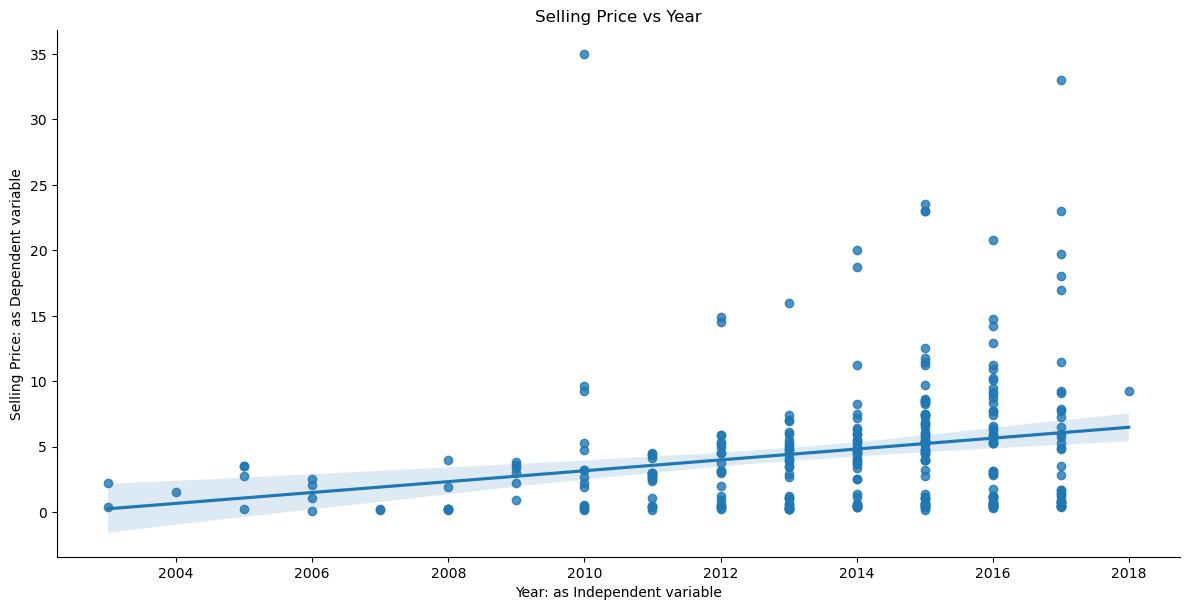

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

car_data = pd.read_csv('car_data.csv')

sns.lmplot(x='Year', y='Selling_Price', data=car_data, aspect=2, height=6)

plt.xlabel('Year: as Independent variable')
plt.ylabel('Selling Price: as Dependent variable')
plt.title('Selling Price vs Year')

plt.show()


------ Les valeurs manquantes dans votre car data ---------

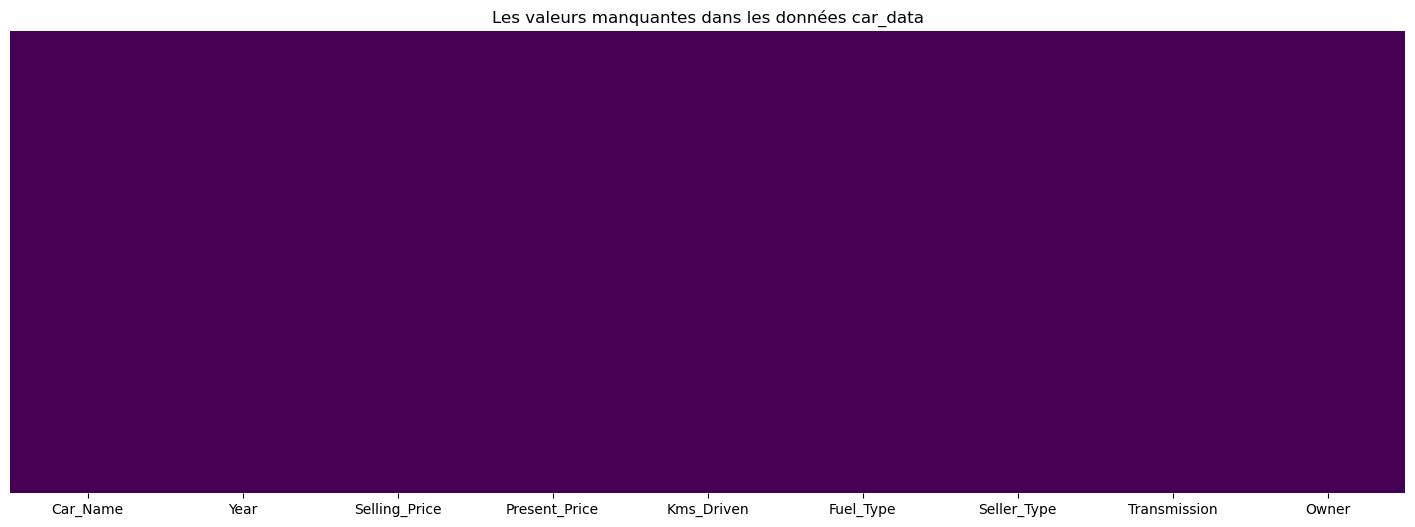

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.heatmap(car_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Les valeurs manquantes dans les données car_data')
plt.show()


Il n'y a aucune valeur manquante dans les données

--------------------- La corrélation entre les éléments ------------

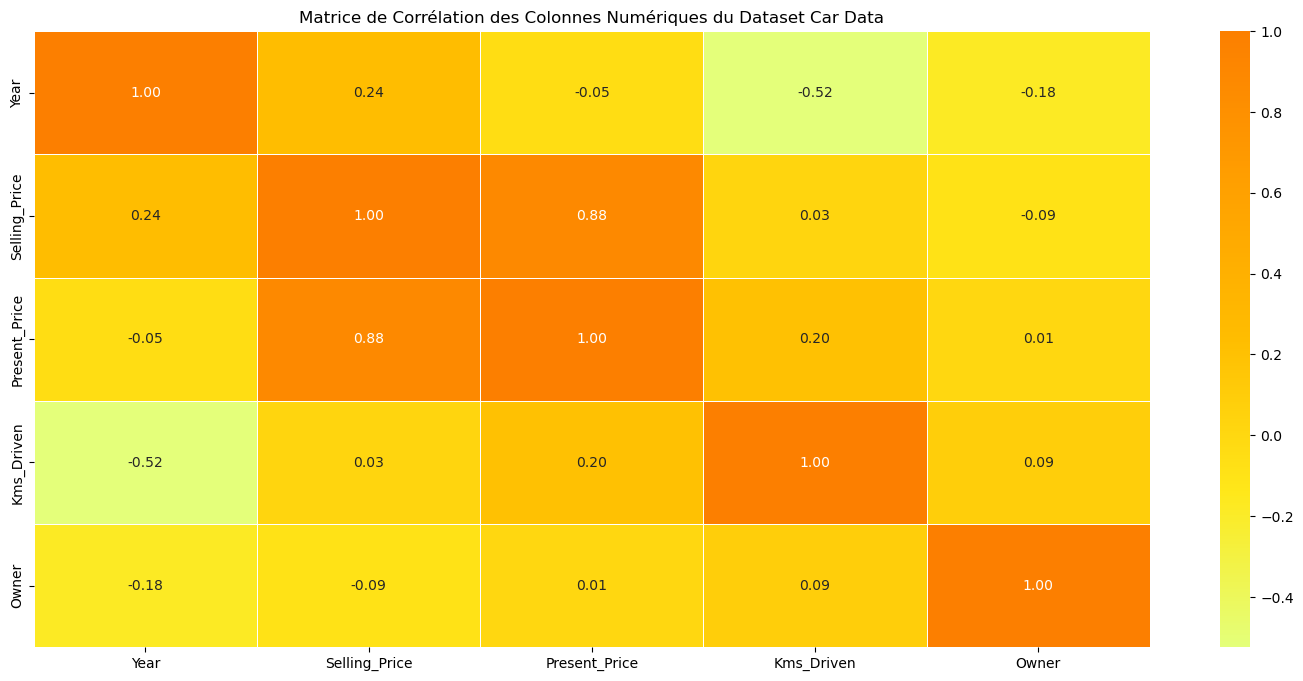

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

car_data = pd.read_csv('car_data.csv')
corr = car_data.select_dtypes('number').corr()
plt.figure(figsize=(18, 8))  
sns.heatmap(corr, cmap='Wistia', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation des Colonnes Numériques du Dataset Car Data')
plt.show()



In [13]:
# Trouver les corrélations au-dessus d'un seuil
threshold = 0.7
strong_corr = corr[(corr > threshold) | (corr < -threshold)]

print(strong_corr)


               Year  Selling_Price  Present_Price  Kms_Driven  Owner
Year            1.0            NaN            NaN         NaN    NaN
Selling_Price   NaN       1.000000       0.878983         NaN    NaN
Present_Price   NaN       0.878983       1.000000         NaN    NaN
Kms_Driven      NaN            NaN            NaN         1.0    NaN
Owner           NaN            NaN            NaN         NaN    1.0


----------------  une visualisation pour les données car_data, afficher la distribution de Selling_Price ------------

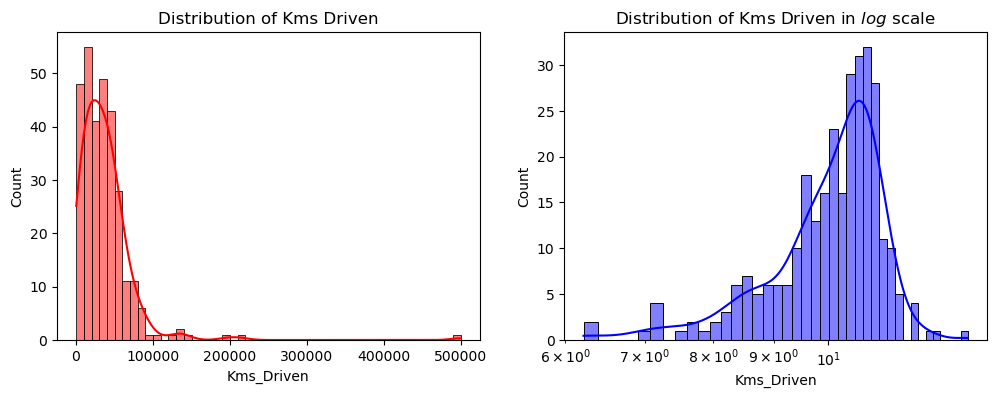

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Créer la figure avec deux sous-graphiques
f = plt.figure(figsize=(12, 4))

# Premier sous-graphe : Distribution de la variable 'Kms_Driven'
ax = f.add_subplot(121)
sns.histplot(car_data['Kms_Driven'], bins=50, color='r', ax=ax, kde=True)
ax.set_title('Distribution of Kms Driven')

# Deuxième sous-graphe : Distribution de la variable 'Kms_Driven' en échelle logarithmique
ax = f.add_subplot(122)
sns.histplot(np.log1p(car_data['Kms_Driven']), bins=40, color='b', ax=ax, kde=True)
ax.set_title('Distribution of Kms Driven in $log$ scale')
ax.set_xscale('log')



------------- Codage -----------

In [ ]:
# Colonnes catégoriques à encoder
categorical_columns = ['Seller_Type', 'Fuel_Type', 'Transmission']

# Encodage avec pd.get_dummies
car_data_encoded = pd.get_dummies(
    data=car_data, 
    prefix='OHE', 
    prefix_sep='_', 
    columns=categorical_columns, 
    drop_first=True, 
    dtype='int8'
)

# Vérifications
print('Colonnes dans le DataFrame original:\n', car_data.columns.values)
print('\nDimensions du DataFrame original:', car_data.shape)

print('\nColonnes dans le DataFrame après encodage:\n', car_data_encoded.columns.values)
print('\nDimensions du DataFrame après encodage:', car_data_encoded.shape)




------------------- Répartition des tests de train ----------

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = car_data.drop('Selling_Price', axis=1)  # Variables indépendantes (caractéristiques des voitures)
y = car_data['Selling_Price']              # Variable dépendante (prix des voitures)

# Étape 2 : Répartition des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=23
)

# Étape 3 : Ajouter la colonne x0 = 1 pour l'interception (manuellement)
X_train_0 = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Étape 4 : Calculer manuellement les paramètres (thêta) pour la régression linéaire
# Utilisation de la formule normale pour l'optimisation des moindres carrés
theta = np.matmul(
    np.linalg.inv(np.matmul(X_train_0.T, X_train_0)),
    np.matmul(X_train_0.T, y_train)
)

# Créer un DataFrame pour afficher les paramètres manuels
parameter = ['theta_' + str(i) for i in range(X_train_0.shape[1])]
columns = ['intercept:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter': parameter, 'Columns': columns, 'Theta_Manual': theta})

# Étape 5 : Utiliser Scikit-learn pour ajuster le modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # Pas besoin d'ajouter x0 = 1, Scikit-learn le fait automatiquement

# Obtenir les paramètres estimés par Scikit-learn
sk_theta = [lin_reg.intercept_] + list(lin_reg.coef_)

# Ajouter les paramètres calculés par Scikit-learn au DataFrame
parameter_df['Sklearn_Theta'] = sk_theta

# Étape 6 : Ajouter x0 = 1 pour l'ensemble de test
X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Afficher le DataFrame final avec les paramètres
print(parameter_df)

# Étape 7 (Optionnelle) : Prédictions sur les données de test
# Prédictions manuelles
y_pred_manual = np.matmul(X_test_0, theta)

# Prédictions avec Scikit-learn
y_pred_sklearn = lin_reg.predict(X_test)

# Comparer les prédictions
comparison = pd.DataFrame({
    'Actual': y_test,
    'Manual_Prediction': y_pred_manual,
    'Sklearn_Prediction': y_pred_sklearn
})

print(comparison.head())


-------------- SSE = Somme des erreurs carrées ------------

----------------- SST = Somme du total carré ----------------

In [ ]:
import numpy as np

X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_norm = np.matmul(X_test_0, theta)
J_mse = np.sum((y_pred_norm - y_test) ** 2) / X_test_0.shape[0]
sse = np.sum((y_pred_norm - y_test) ** 2)  # Somme des carrés des erreurs
sst = np.sum((y_test - y_test.mean()) ** 2)  # Somme totale des carrés
R_square = 1 - (sse / sst)

# Résultats
print('The Mean Square Error (MSE) or J(theta) is:', J_mse)
print('R square obtained for normal equation method is:', R_square)


y_pred_sk = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_test, y_pred_sk)

R_square_sk = lin_reg.score(X_test, y_test)

print('The Mean Square Error (MSE) or J(theta) is:', J_mse_sk)
print('R square obtained for scikit-learn library is:', R_square_sk)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérification de la linéarité : Valeurs réelles vs valeurs prédites
f = plt.figure(figsize=(14, 5))

# Graphe 1 : Réel vs Prédit
ax1 = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_sk, ax=ax1, color='r')
ax1.set_title('Check for Linearity:\n Actual Vs Predicted value')
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')

# Vérification de la normalité des résidus
ax2 = f.add_subplot(122)
residuals = y_test - y_pred_sk
sns.histplot(residuals, kde=True, ax=ax2, color='b')
ax2.axvline(residuals.mean(), color='k', linestyle='--', label='Mean')
ax2.set_title('Check for Residual Normality & Mean: \n Residual Error')
ax2.set_xlabel('Residuals')
ax2.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()


---- autre proposition -----

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Charger les données
data = pd.read_csv("car_data.csv")

# Prétraitement
data = data.drop("Car_Name", axis=1)
data = pd.get_dummies(data, drop_first=True)  # Encodage des colonnes catégorielles

# Définir les variables indépendantes (X) et dépendantes (y)
X = data.drop("Selling_Price", axis=1)
y = data["Selling_Price"]

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Évaluation
y_pred = model.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))

# Prédiction pour un exemple spécifique
example = pd.DataFrame([{
    'Year': 2016,
    'Present_Price': 5.5,
    'Kms_Driven': 24000,
    'Owner': 0,
    'Fuel_Type_Diesel': 0,
    'Fuel_Type_Petrol': 1,
    'Seller_Type_Individual': 1,
    'Transmission_Manual': 0
}])
predicted_price = model.predict(example)
print("Prix prédit :", predicted_price[0])


MAE : 1.2162256821295867
R² : 0.8489813024898013
Prix prédit : 5.071064872229044
